In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

Sklearn is used to analyse data with simple and effective tools.

In [2]:
df = pd.read_csv('data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [3]:
# How to count customers according to category ? 
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

According to(K Nearest Neighbor ) algortim, so as to calculate the distance from per one point to another point, we use geometrical calculation. For this, we ought to create a matrix including per value inside our data set.





In [6]:
# Step 1: Take column names from df:
df.columns

# Step 2: Create a feature matrix enabling to get access to values by using columns' name taken above.
# Except for custcat column, we have gotten all columns names here.

x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
print(x)

# Step 3: Create a matrix including values of custcat.

y = df['custcat'].values
print(y)

[[ 2. 13. 44. ...  0.  0.  2.]
 [ 3. 11. 33. ...  0.  0.  6.]
 [ 3. 68. 52. ...  0.  1.  2.]
 ...
 [ 3. 67. 59. ...  0.  1.  1.]
 [ 3. 70. 49. ...  0.  1.  1.]
 [ 3. 50. 36. ...  0.  1.  3.]]
[1 4 3 1 3 3 2 4 3 2 1 3 1 4 1 2 3 3 1 4 2 1 4 1 3 3 4 3 1 2 2 4 3 2 4 2 4
 3 3 3 3 3 1 4 3 2 2 4 1 3 1 2 4 1 1 1 2 1 3 2 3 4 1 4 4 1 3 3 1 1 1 2 1 2
 3 1 3 1 3 4 4 1 4 3 2 1 2 4 4 3 2 1 2 4 1 4 3 2 3 2 4 3 3 2 2 2 1 4 1 2 2
 2 1 2 3 1 3 3 3 1 1 1 1 2 1 2 4 2 2 4 3 1 4 2 3 1 1 3 3 4 4 3 4 2 3 1 4 2
 2 2 1 3 4 4 4 3 1 1 2 3 3 3 1 3 2 2 4 1 1 2 4 1 4 1 2 1 3 4 4 1 4 1 2 2 2
 1 1 2 3 3 1 4 2 3 4 1 1 3 1 4 1 4 2 2 4 1 3 4 3 3 1 1 1 2 2 1 3 4 4 1 3 4
 1 3 1 4 4 1 3 3 3 3 2 1 4 2 4 4 1 4 1 4 3 2 1 3 2 1 1 2 1 4 2 2 4 3 2 1 4
 4 4 1 3 2 1 1 3 3 3 1 3 2 4 1 3 2 2 3 3 1 4 4 3 2 3 3 4 3 3 2 4 3 2 3 4 4
 3 1 4 2 3 3 2 2 1 4 2 3 4 1 1 2 2 4 4 1 3 1 4 1 4 3 2 4 1 3 1 3 4 1 1 1 1
 4 2 1 3 1 1 3 1 4 1 4 3 1 2 3 4 4 4 3 1 3 2 3 2 2 3 3 3 3 4 2 3 1 4 3 1 4
 4 3 2 4 1 1 2 2 4 1 1 2 3 2 2 3 1 4 3 2 1 4 4 4 3 4 3 2 3

We will transform x data set's values to nonconstant values by dividing for each value inside data set 
by their standart deviation. Preprocessing helps us perform the following operation.
Fit enables us to perform the opearation of StandartScaler. Then, because we will need float value, we transformed the result here.

In [7]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(x)

[[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]


In [10]:
k_neighbor = int(input('Please type K number: '))

# Because of Index logic, we have made subtraction.
array_lenght = k_neighbor - 1

# Numpy zeros() gives us new array filled with zero.
jsi_acc = np.zeros(array_lenght)
std_acc = np.zeros(array_lenght)

for k in range(1, k_neighbor):
    # KNeighborsClassifier helps us implement the k-nearest neighbors vote of classifier.
    neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    jsi_acc[k - 1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[k - 1] = np.std(y_pred == y_test) / np.sqrt(y_pred.shape[0])
    
print(jsi_acc)
print(std_acc)

# According to jaccard similarity index, we aim to find the similarity between two objects or data sets.

Please type K number:  5


[0.29 0.31 0.41 0.29]
[0.04537621 0.04624932 0.04918333 0.04537621]


In [11]:
f'The best accuracy was with: {jsi_acc.max()}, with k={jsi_acc.argmax()}'

'The best accuracy was with: 0.41, with k=2'

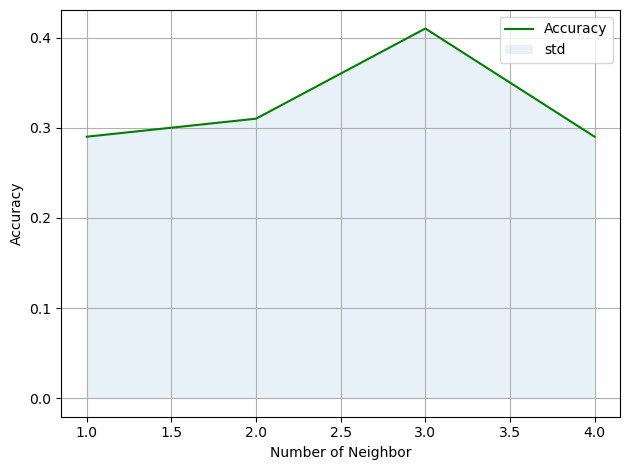

In [12]:
plt.plot(range(1, k_neighbor), jsi_acc, 'g')
plt.fill_between(range(1, k_neighbor), jsi_acc - 1 * std_acc + 1 * std_acc, alpha=0.1)
plt.legend(('Accuracy', 'std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbor')
plt.grid(True)
plt.tight_layout()
plt.show()